In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from pyrotoolbox.parsers import parse
from pyrotoolbox.pH import (calculate_pH, calculate_pH_from_calibration, calculate_pH_from_interpolated_calibration, 
                            calculate_pH_with_prospective_drift_compensation)

# recalc with different calibration

In [2]:
pH_hl_1, m_pH_hl_1 = parse('rovdata/PH2ROV1.txt')
pH_hl_2, m_pH_hl_2 = parse('rovdata/PH2ROV2.txt')

In [3]:
pH_hl_1

,status,dphi,sample_temperature,case_temperature,signal_intensity,ambient_light,pressure,humidity,pH,R,time_s
date_time,,,,,,,,,,,
2024-04-08 13:55:32,0.0,21.674,26.864,27.20,293.129,27.902,983.661,34.791,4.820,1.576412,0.0
2024-04-08 13:56:32,0.0,21.680,26.916,26.97,294.613,26.226,984.164,35.085,NaN,1.577852,60.0
2024-04-08 13:57:32,0.0,21.686,27.272,26.80,291.169,26.382,984.078,35.250,NaN,1.578747,120.0
2024-04-08 13:58:32,0.0,21.689,27.397,26.71,290.793,26.150,983.909,35.310,NaN,1.579240,180.0
2024-04-08 13:59:32,0.0,21.695,27.459,26.64,290.417,26.679,983.721,35.383,NaN,1.579230,240.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09 17:25:32,0.0,33.999,29.246,26.80,162.006,32.015,1042.066,43.950,8.016,0.714338,7961400.0
2024-07-09 17:26:32,0.0,33.610,28.997,27.93,163.530,31.317,1042.987,42.979,8.004,0.727966,7961460.0
2024-07-09 17:27:32,0.0,33.761,28.950,28.68,162.294,29.670,1044.064,42.391,8.017,0.717720,7961520.0


In [4]:
calculate_pH_from_calibration?

Signature:
calculate_pH_from_calibration(
    R,
    temperature,
    salinity,
    calibration: dict,
    **kwargs,
)
Docstring:
apply a pH calibration to measurement data for FW >= 410

The calibration parameters can be passed from the calibration metadata.

Example usage:
apply_pH_calibration(data['R'], data['temp'], data['salinity'], m['calibration'])

:param R: R-value from the sensor
:param temperature: temperature of the sample in °C
:param salinity: salinity of the sample in g/L
:param calibration: calibration dictionary as created by the parsers
:param kwargs: kwargs are inserted into the calibration and override the values
:return: calculated pH values
File:      ~/Programmieren/pyrotoolbox/pyrotoolbox/pH.py
Type:      function

In [5]:
pH_hl_1['pH_endcal'] = calculate_pH_from_calibration(pH_hl_1['R'], 
                                                              pH_hl_1['sample_temperature'],
                                                              m_pH_hl_1['settings']['salinity'],
                                                              m_pH_hl_2['calibration'])

/home/christoph/.venvs/pyro/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
pH_hl_1

,status,dphi,sample_temperature,case_temperature,signal_intensity,ambient_light,pressure,humidity,pH,R,time_s,pH_endcal
date_time,,,,,,,,,,,,
2024-04-08 13:55:32,0.0,21.674,26.864,27.20,293.129,27.902,983.661,34.791,4.820,1.576412,0.0,NaN
2024-04-08 13:56:32,0.0,21.680,26.916,26.97,294.613,26.226,984.164,35.085,NaN,1.577852,60.0,NaN
2024-04-08 13:57:32,0.0,21.686,27.272,26.80,291.169,26.382,984.078,35.250,NaN,1.578747,120.0,NaN
2024-04-08 13:58:32,0.0,21.689,27.397,26.71,290.793,26.150,983.909,35.310,NaN,1.579240,180.0,NaN
2024-04-08 13:59:32,0.0,21.695,27.459,26.64,290.417,26.679,983.721,35.383,NaN,1.579230,240.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09 17:25:32,0.0,33.999,29.246,26.80,162.006,32.015,1042.066,43.950,8.016,0.714338,7961400.0,7.864503
2024-07-09 17:26:32,0.0,33.610,28.997,27.93,163.530,31.317,1042.987,42.979,8.004,0.727966,7961460.0,7.849334
2024-07-09 17:27:32,0.0,33.761,28.950,28.68,162.294,29.670,1044.064,42.391,8.017,0.717720,7961520.0,7.864751


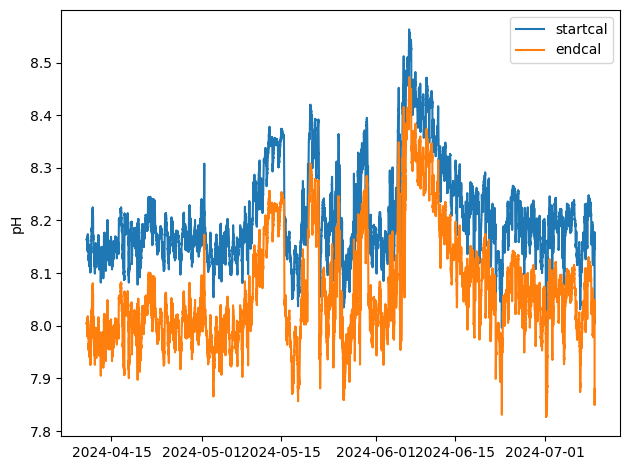

In [7]:
fig, ax = plt.subplots()
ax.plot(pH_hl_1['pH']['2024-04-10 15:00':], label='startcal')
ax.plot(pH_hl_1['pH_endcal']['2024-04-10 15:00':], label='endcal')
ax.legend()
ax.set_ylabel('pH')
fig.tight_layout()

# calculate with different temperature

In [8]:
pH_hl_1['pH_fixedT25'] = calculate_pH_from_calibration(pH_hl_1['R'], 
                                                              25,
                                                              m_pH_hl_1['settings']['salinity'],
                                                              m_pH_hl_1['calibration'])

# calculate with device temperature

In [9]:
pH_hl_1['pH_devT'] = calculate_pH_from_calibration(pH_hl_1['R'], 
                                                              pH_hl_1['case_temperature'],
                                                              m_pH_hl_1['settings']['salinity'],
                                                              m_pH_hl_1['calibration'])

/home/christoph/.venvs/pyro/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# calculate with 40 PSU

In [10]:
pH_hl_1['pH_PSU40'] = calculate_pH_from_calibration(pH_hl_1['R'], 
                                                              pH_hl_1['sample_temperature'],
                                                              40,
                                                              m_pH_hl_1['calibration'])

/home/christoph/.venvs/pyro/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


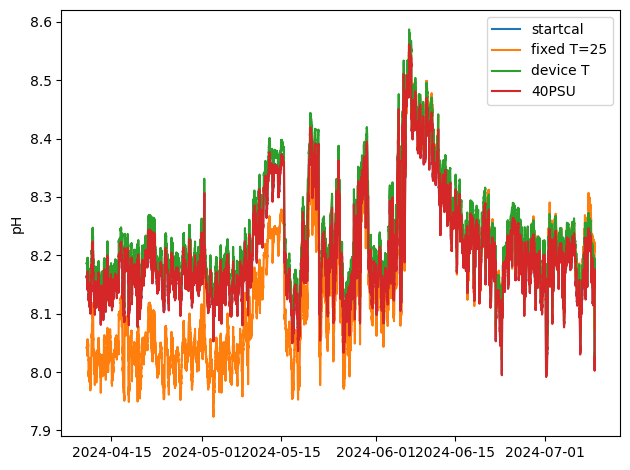

In [11]:
fig, ax = plt.subplots()
ax.plot(pH_hl_1['pH']['2024-04-10 15:00':], label='startcal')
ax.plot(pH_hl_1['pH_fixedT25']['2024-04-10 15:00':], label='fixed T=25')
ax.plot(pH_hl_1['pH_devT']['2024-04-10 15:00':], label='device T')
ax.plot(pH_hl_1['pH_PSU40']['2024-04-10 15:00':], label='40PSU')
ax.legend()
ax.set_ylabel('pH')
fig.tight_layout()

# Interpoliertat pH drift correction

In [12]:
pH_hl_1['pH_interpol_corr'] = calculate_pH_from_interpolated_calibration(
                                                pH_hl_1['R'], 
                                                pH_hl_1['sample_temperature'], 
                                                35, 
                                                {'2024-04-08 13:35': m_pH_hl_1['calibration'],
                                                 '2024-07-09 13:00': m_pH_hl_2['calibration']})

/home/christoph/.venvs/pyro/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Prospective pH drift correction

In [13]:
pH_hl_1['pH_corr_prosp'] = calculate_pH_with_prospective_drift_compensation(
                                                pH_hl_1['R'], 
                                                pH_hl_1['sample_temperature'], 
                                                35,
                                                m_pH_hl_1['calibration'], 4.3652*10**10, 9.0761*10**3,0,0)

/home/christoph/.venvs/pyro/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


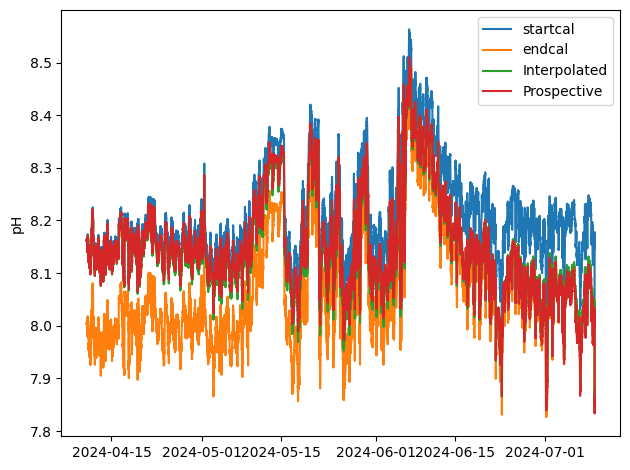

In [14]:
fig, ax = plt.subplots()
ax.plot(pH_hl_1['pH']['2024-04-10 15:00':], label='startcal')
ax.plot(pH_hl_1['pH_endcal']['2024-04-10 15:00':], label='endcal')
ax.plot(pH_hl_1['pH_interpol_corr']['2024-04-10 15:00':], label='Interpolated')
ax.plot(pH_hl_1['pH_corr_prosp']['2024-04-10 15:00':], label='Prospective')
ax.legend()
ax.set_ylabel('pH')
fig.tight_layout()